In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

# Import data
path = "../Data/appointment_clean2.csv"

noshow_df = pd.read_csv(path)
noshow_df

,Gender,ScheduledDay,Days Diff,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Outcome,Comorbidities
0,1,4,0,4,62,1,0,1,0,0,0,0,1,1
1,0,4,0,4,56,1,0,0,0,0,0,0,1,0
2,1,4,0,4,62,2,0,0,0,0,0,0,1,0
3,1,4,0,4,8,3,0,0,0,0,0,0,1,0
4,1,4,0,4,56,1,0,1,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110510,1,1,35,1,56,23,0,0,0,0,0,1,1,0
110511,1,1,35,1,51,23,0,0,0,0,0,1,1,0
110512,1,2,41,1,21,23,0,0,0,0,0,1,1,0
110513,1,2,41,1,38,23,0,0,0,0,0,1,1,0


In [2]:
X = noshow_df.drop('Outcome', axis=1)
y = noshow_df['Outcome']

In [3]:
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=50)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [4]:
class_distribution_before = y.value_counts()
class_distribution_after = pd.Series(y_resampled).value_counts()

print("Class Distribution Before Undersampling:")
print(class_distribution_before)

print("\nClass Distribution After Undersampling:")
print(class_distribution_after)

Class Distribution Before Undersampling:
Outcome
1    88199
0    22316
Name: count, dtype: int64

Class Distribution After Undersampling:
Outcome
0    22316
1    22316
Name: count, dtype: int64


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=50)

In [6]:
rf_model = RandomForestClassifier(random_state=50)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

In [7]:
y_pred = rf_model.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.72      0.67      4474
           1       0.67      0.59      0.63      4453

    accuracy                           0.65      8927
   macro avg       0.66      0.65      0.65      8927
weighted avg       0.66      0.65      0.65      8927


Confusion Matrix:
[[3209 1265]
 [1835 2618]]


In [9]:
feature_importances = rf_model.feature_importances_
print('\nFeature Importances:')
print(dict(zip(X.columns, feature_importances)))


Feature Importances:
{'Gender': 0.023966516022550864, 'ScheduledDay': 0.057173205454769886, 'Days Diff': 0.2610291188787596, 'AppointmentDay': 0.05335246786384699, 'Age': 0.28955772364424337, 'Neighbourhood': 0.2594070087649078, 'Scholarship': 0.010160223244869655, 'Hipertension': 0.004821643761590654, 'Diabetes': 0.003954899484878888, 'Alcoholism': 0.0032596350996894068, 'Handcap': 0.006898916133863116, 'SMS_received': 0.018349353339638955, 'Comorbidities': 0.00806928830639073}


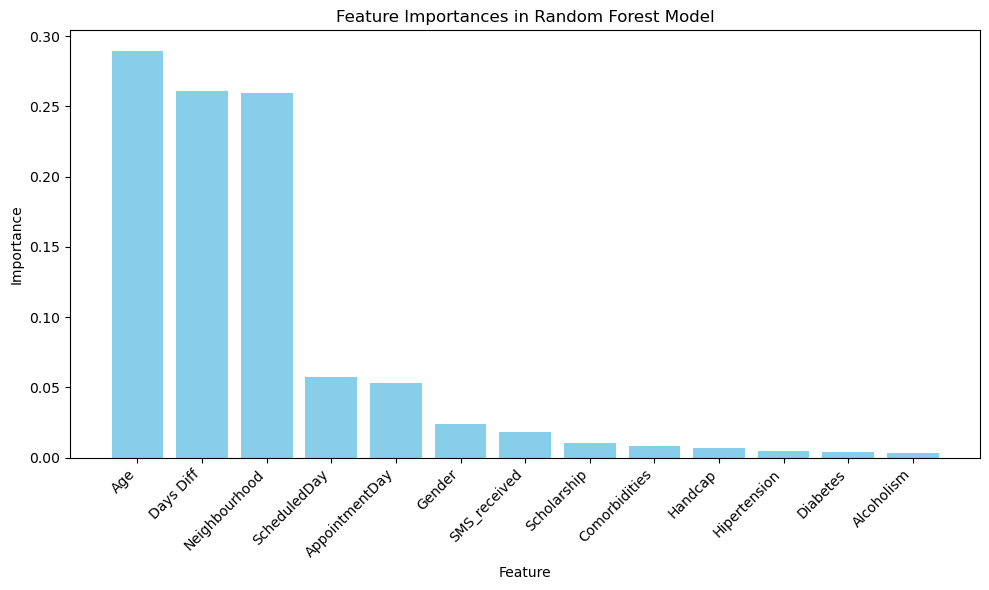

In [10]:
# Plot features by importance
feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})


importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()